In [79]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pathpy as pp
import random
from enum import Enum
from typing import Callable

### 1. Scale-Free Networks

#### a)

In [37]:

gamma = 2.5
n = 1000
degrees = [1]
while not pp.generators.is_graphic_Erdos_Gallai(degrees):
    degrees = np.random.zipf(a=gamma,size=n).astype(int)
net = pp.generators.Molloy_Reed(degrees)

In [38]:
probs =  np.bincount(degrees) / n
cum_probs = 1 - np.cumsum(probs)

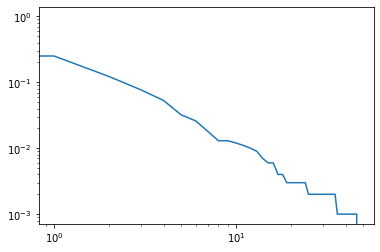

In [44]:
plt.loglog(cum_probs)

#### b)

In [80]:
def growth_model(m_0: int, n: int, m: int, growth_function: Callable[[pp.Network, int, int],None]) -> pp.Network:
    import itertools
    assert m <= m_0
    assert n >= m_0

    # Create intial clique
    net = pp.Network(directed=False)
    net.add_nodes([f"i{i}" for i in range(m_0)])
    for (u,v) in itertools.combinations(net.nodes, 2):
        net.add_edge(u,v)
    
    # Grow the network to the desired size
    num_growth_steps = n - m_0
    for step in range(num_growth_steps):
       growth_function(net, m, step)
    
    return net




In [77]:
def grow_uniform(net: pp.Network, m: int,  step: int):
    neighborhood = np.random.choice(net.nodes, size=m, replace=False)
    new_node = pp.Node(f"g{step}")
    net.add_node(new_node)
    net.add_edges([pp.Edge(new_node, node) for node in neighborhood])

In [81]:
def grow_barabasi_albert(net: pp.Network, m: int, step: int):
    current_nodes = list(net.nodes)
    total_degree = net.number_of_edges() * 2
    probs = [net.degrees()[node.uid] / total_degree for node in current_nodes]
    neighborhood = np.random.choice(current_nodes, p=probs, size=m, replace=False)
    new_node = pp.Node(f"g{step}")
    net.add_node(new_node)
    net.add_edges([pp.Edge(new_node, node) for node in neighborhood])

In [ ]:
def barabasi_albert(m_0: int, n: int, m: int) -> pp.Network:
    return growth_model(m_0, n, m, grow_barabasi_albert)